In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/class/datamine/apps/jupyter/kernels/lab/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/class/datamine/apps/jupyter/kernels/lab/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/class/datamine/apps/jupyter/kernels/lab/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/class/datamine/apps/jupyter/kernels/lab/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/class/datamine/apps/jupyter/kernels/lab/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  r

Done!


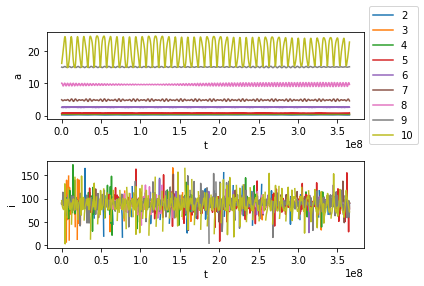

In [123]:
# Convert cartesian to orbital coordinates
# (r, v) = (x, y, z, v_x, v_y, v_z)
# (a, e, inclination, lon_asc_node, arg_peri, true_anom)

#set mu = 1
mu = 1

fig, (ax1, ax2) = plt.subplots(2)

for k in range(2, 11):
    
    data_path = "id0000"
    if(k < 10):
        data_path = data_path + "0" + str(k)
    else:
        data_path = data_path + str(k) 
        
    data = pd.read_csv("data/" + data_path + "-XV.csv")
    # print(data.loc[0:5])
    # print(data.iloc[:,0])

    # Calculate h, r, and v magnitudes
    h = 0
    r = 0
    v = 0

    hx = data.iloc[:, 1] * data.iloc[:, 4] # x-component of the angular momentum
    hy = data.iloc[:, 2] * data.iloc[:, 5] # y-component of the angular momentum
    hz = data.iloc[:, 3] * data.iloc[:, 6] # z-component of the angular momentum

    for i in range(1, 4):
        h += data.iloc[:,i] * data.iloc[:, i + 3]
        r += data.iloc[:,i]**2
        v += data.iloc[:,i + 3]**2

    r = np.sqrt(r)
    v = np.sqrt(v)

    # print(h)
    # print(r)
    # print(v)

    # Calculate E, a, e, inclination, lon_asc_node, arg_peri, and true_anom
    E = 0
    a = 0
    e = 0
    lon_asc_node = 0 
    arg_peri = 0 
    true_anom = 0

    E = v**2 / 2 - mu / r
    a = -1 * mu / (2 * E)
    e = np.sqrt(1 - h**2 / (a * mu))

    inclination = np.arccos(hz/h) 

    lon_asc_node = np.arctan2(hx, -1 * hy)

    true_anom = np.arcsin(a * (1 - e**2) / (h * e) * v) 

    arg_peri = np.arcsin(data.iloc[:,3] / (r * np.sin(inclination))) - true_anom

    # print(true_anom)
    # print(arg_peri)

    # Export to csv file
    export_headers = ['t', 'a', 'e', 'inclination', 'lon_asc_node', 'arg_peri', 'true_anom']

    export_data = pd.DataFrame(data.iloc[:,0])#, columns =['t'])
    # export_data[export_headers[0]] = data.iloc[:,0]
    export_data[export_headers[1]] = a
    export_data[export_headers[2]] = e
    export_data[export_headers[3]] = inclination * 180 / np.pi
    export_data[export_headers[4]] = lon_asc_node
    export_data[export_headers[5]] = arg_peri * 180 / np.pi
    export_data[export_headers[6]] = true_anom * 180 / np.pi
    
#     print(export_data.iloc[:,0])
#     print(export_data.iloc[:,1])
    
    # Make plots for a vs t and i vs t
    ax1.plot(export_data.iloc[:,0], export_data.iloc[:,1], label = str(k))
    ax2.plot(export_data.iloc[:,0], export_data.iloc[:,3], label = str(k))

    export_data.to_csv("data/" + data_path + "-EL.csv", index = False, header = export_headers)
    

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend()

ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_ylabel('a')
ax2.set_ylabel('i')

plt.tight_layout()
# plt.show()
plt.savefig('plots/Q4plots.jpg', dpi = 200)

print("Done!")


